In [113]:
import yfinance as yf
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt

import statsmodels.api as sm
import pylab
from scipy.stats import skew, kurtosis, jarque_bera
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

In [114]:
plt.style.use('seaborn')

/tmp/ipykernel_1255307/240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [115]:
gbm_path = '../results/tstr_log-13/'
data_path = gbm_path
real = np.load(data_path + 'real_samples.npy')
synth = np.load(data_path + 'synth_samples.npy')

In [116]:
real.shape

(10000, 390)

In [117]:
synth.shape

(10000, 390)

In [118]:
# plt.plot(real[0]**2, label='real')
# plt.plot(synth[0]**2, label='synth')
# plt.legend()

In [119]:
# plt.plot(real[0], label='real')
# plt.legend()

In [120]:
# plt.plot(synth[0], label='synth')
# plt.legend()

In [121]:
from uncond_ts_diff.utils import descale

In [122]:
scale = np.mean(
            np.abs(real[..., : -30]),
            axis=-1,
            keepdims=True,
        )
scale

array([[152.33937],
       [159.41362],
       [185.719  ],
       ...,
       [114.13186],
       [115.00773],
       [121.65028]], dtype=float32)

In [123]:
synth_descaled = descale(synth, scale, 'mean')

In [124]:
synth_descaled

array([[120.68561 , 121.29795 , 121.54837 , ..., 174.13882 , 174.78886 ,
        173.88344 ],
       [148.54837 , 147.57452 , 146.61185 , ..., 174.64273 , 172.82437 ,
        173.66095 ],
       [159.28844 , 160.30237 , 160.88756 , ..., 224.20573 , 224.09947 ,
        220.29868 ],
       ...,
       [105.952324, 105.64286 , 105.973274, ..., 128.86938 , 129.88814 ,
        130.19012 ],
       [ 96.67225 ,  97.407646,  97.25283 , ..., 119.90469 , 122.29164 ,
        122.80227 ],
       [108.03856 , 108.41385 , 109.63406 , ..., 132.14111 , 128.51193 ,
        128.0137  ]], dtype=float32)

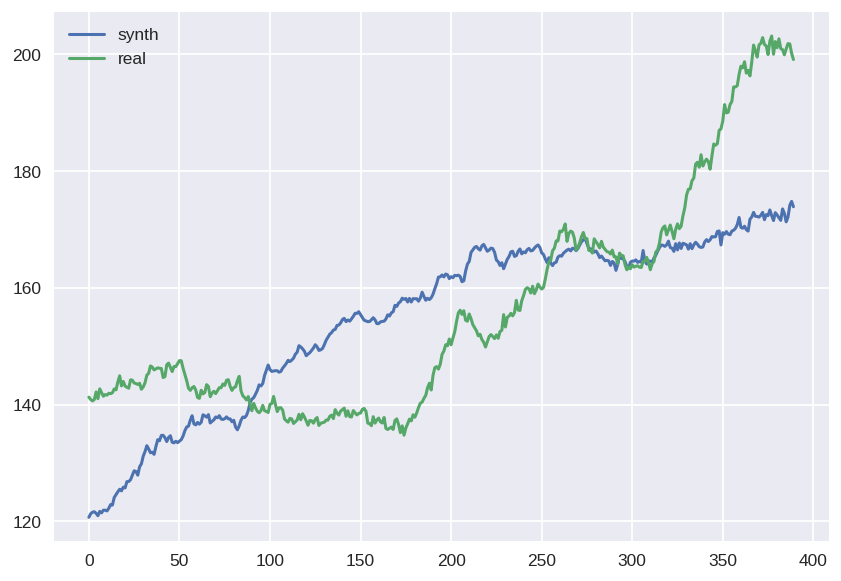

In [125]:
plt.plot(synth_descaled[0], label='synth')
plt.plot(real[0], label='real')
plt.legend()

In [126]:
synth_descaled[0:10].shape

(10, 390)

In [127]:
# plt.plot(np.arange(real.shape[1]), real[0:100].T)
# plt.title('Real GBM')
# plt.xlabel("Timesteps")
# plt.ylabel("Stock price")
# plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


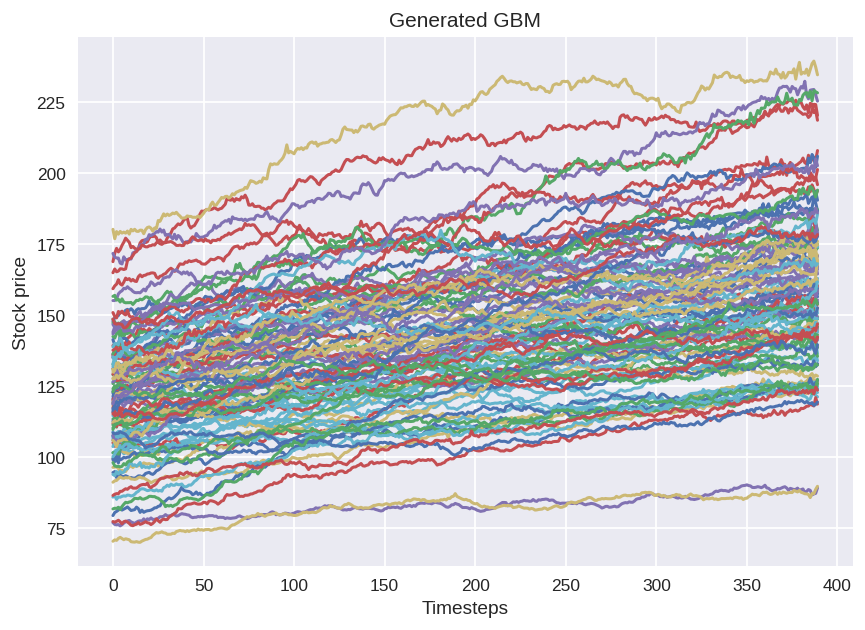

In [128]:
plt.plot(np.arange(synth_descaled.shape[1]), synth_descaled[0:100].T)
plt.title('Generated GBM')
plt.xlabel("Timesteps")
plt.ylabel("Stock price")
plt.legend()

In [129]:
n = real.shape[1]

In [130]:
def estimate_gbm_parameters(prices: np.ndarray):

    # Calculate log returns
    log_returns = np.log(prices[1:] / prices[:-1])
    mu = np.mean(log_returns) * n
    sigma = np.std(log_returns) * np.sqrt(n)

    mu_adjusted = mu + (sigma**2 / 2)

    return mu_adjusted, sigma


In [131]:
mus = []
sigmas = []

for prices in real:
  mu, sigma = estimate_gbm_parameters(prices)
  mus.append(mu)
  sigmas.append(sigma)
print("Estimated mu:", np.mean(mus))
print("Estimated sigma:", np.mean(sigmas))

Estimated mu: 0.1985013245744648
Estimated sigma: 0.12463702616577917


In [132]:
mus = []
sigmas = []

for prices in synth_descaled:
  mu, sigma = estimate_gbm_parameters(prices)
  mus.append(mu)
  sigmas.append(sigma)
print("Estimated mu:", np.mean(mus))
print("Estimated sigma:", np.mean(sigmas))

Estimated mu: 0.2880082036352286
Estimated sigma: 0.08502123918519594


In [133]:
# plt.hist(real[0], label='real')

In [134]:
# plt.hist(synth_descaled[0], label='synth')

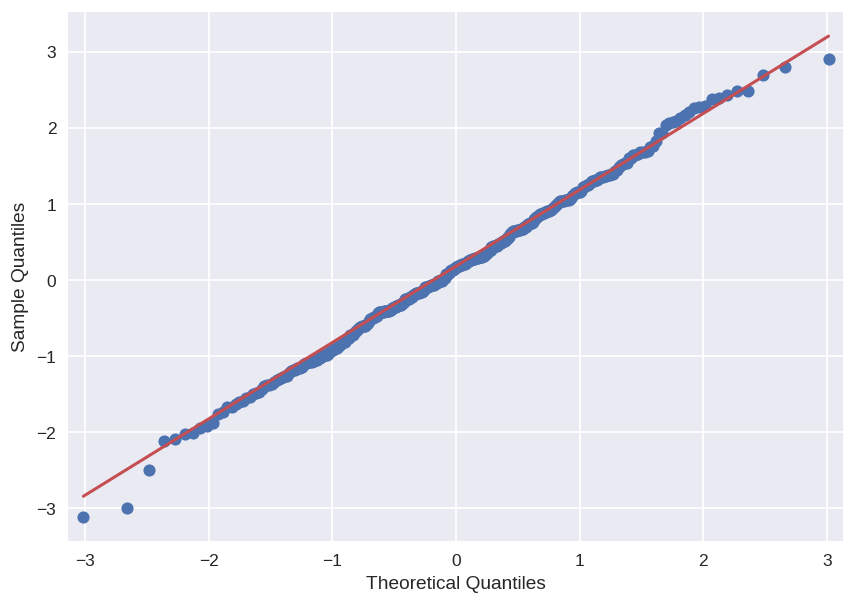

In [135]:
sm.qqplot(np.diff(real[0]), line='q', a=1/2)
pylab.show()

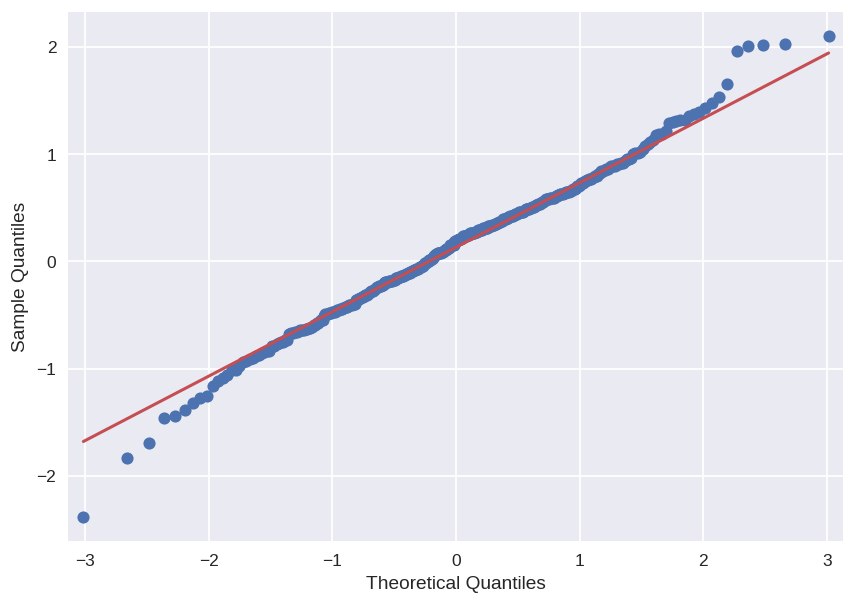

In [136]:
sm.qqplot(np.diff(synth_descaled[0]), line='q', a=1/2)
pylab.show()

In [137]:
mean_ret = np.mean(real[0])
std_dev_ret = np.std(real[0])
skewness_ret = skew(real[0])
kurtosis_ret = kurtosis(real[0])  # This function returns excess kurtosis by default

print("real: Sample Mean:", mean_ret)
print("real: Sample Standard Deviation:", std_dev_ret)
print("real: Sample Skewness:", skewness_ret)
print("real: Sample Kurtosis:", kurtosis_ret)

jb_test = jarque_bera(real[0])
print("real: Jarque-Bera test statistic:", jb_test.statistic)
print("real: Jarque-Bera test p-value:", jb_test.pvalue)


real: Sample Mean: 156.03386
real: Sample Standard Deviation: 19.174273
real: Sample Skewness: 1.0150773891150455
real: Sample Kurtosis: 0.012919878740301094
real: Jarque-Bera test statistic: 66.97734713696399
real: Jarque-Bera test p-value: 2.857944975229971e-15


In [138]:
mean_ret = np.mean(synth_descaled[0])
std_dev_ret = np.std(synth_descaled[0])
skewness_ret = skew(synth_descaled[0])
kurtosis_ret = kurtosis(synth_descaled[0])  # This function returns excess kurtosis by default

print("synthetic: Sample Mean:", mean_ret)
print("synthetic: Sample Standard Deviation:", std_dev_ret)
print("synthetic: Sample Skewness:", skewness_ret)
print("synthetic: Sample Kurtosis:", kurtosis_ret)

jb_test = jarque_bera(synth_descaled[0])
print("synthetic: Jarque-Bera test statistic:", jb_test.statistic)
print("synthetic: Jarque-Bera test p-value:", jb_test.pvalue)

synthetic: Sample Mean: 154.96579
synthetic: Sample Standard Deviation: 14.618293
synthetic: Sample Skewness: -0.7754454687033538
synthetic: Sample Kurtosis: -0.6408200324958395
synthetic: Jarque-Bera test statistic: 45.75871985552889
synthetic: Jarque-Bera test p-value: 1.1577645134102793e-10


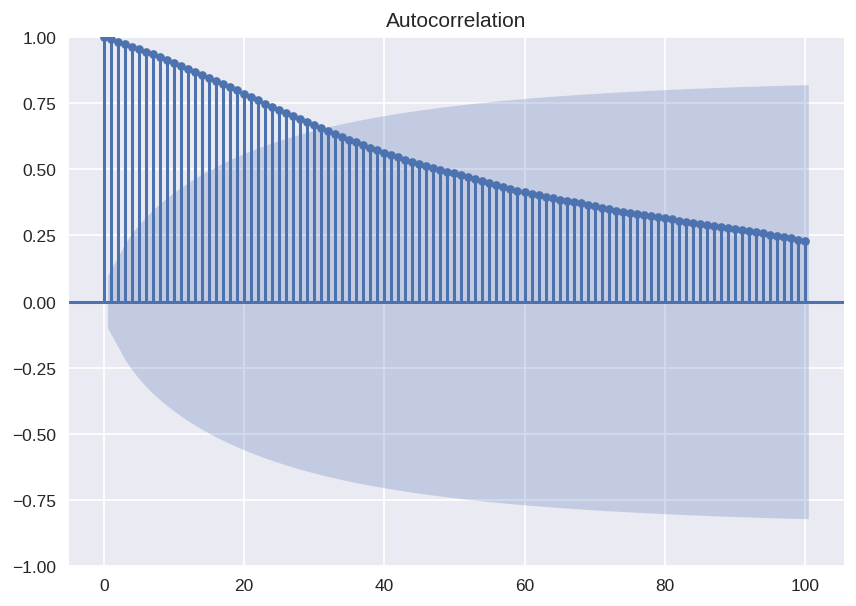

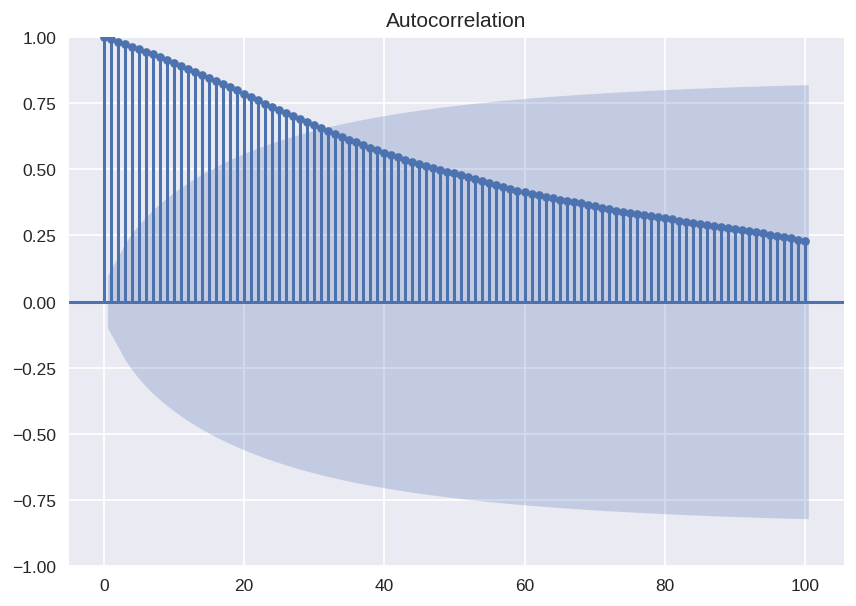

In [139]:
plot_acf(real[0], lags=100)

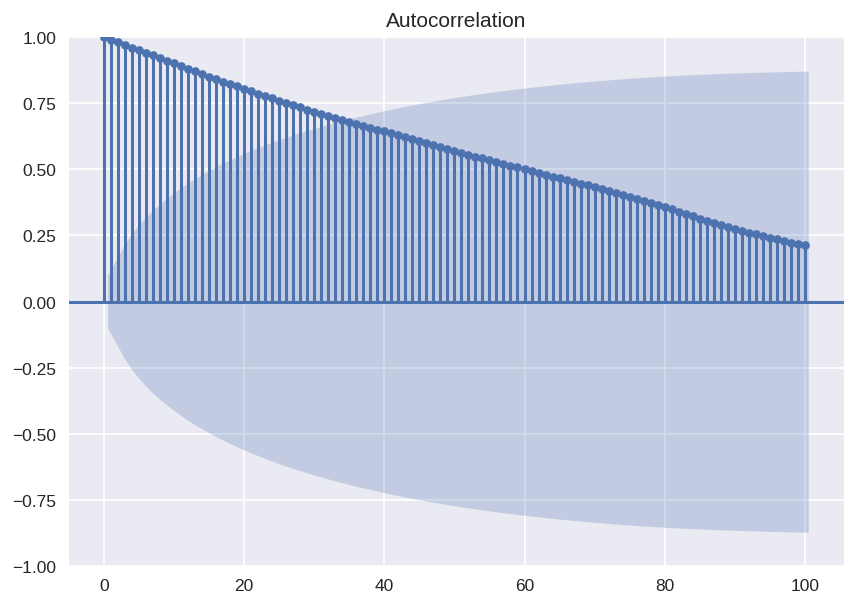

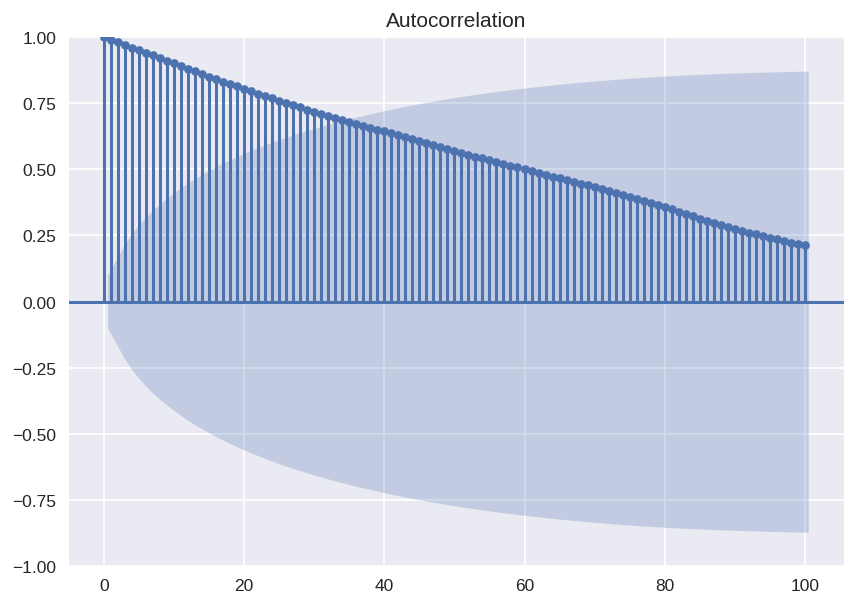

In [140]:
plot_acf(synth_descaled[0], lags=100)